# USED CAR PRICE PREDICTION REGRESSION ANALYSIS

**Data Description:** Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one. Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle.Size of training set: 6,019 records Size of test set: 1,234 records. 

**Data Definition:** 
Name: The brand and model of the car. 

Location: The location in which the car is being sold or is available for purchase. 

Year: The year or edition of the model. 

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM. 

Fuel_Type: The type of fuel used by the car. 

Transmission: The type of transmission used by the car. 

Owner_Type: Whether the ownership is Firsthand, Second hand or other. 

Mileage: The standard mileage offered by the car company in kmpl or km/kg 

Engine: The displacement volume of the engine in cc. 

Power: The maximum power of the engine in bhp. 

Seats: The number of seats in the car. 

New_Price: The price of a new car of the same model. 

Price: The price of the used car in INR Lakhs.

In [13]:
#for dataframe maulpulations and calculations
import pandas as pd
import numpy as np

#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for knn, linear regression and decision tree algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import re

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#to get consistent results.
import random
random.seed(0)

## 1. Data Preparation

In [14]:
#loading and previewing the data
df=pd.read_csv('used_cars_train.csv')
df2=df.copy()
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [15]:
#checking the shape
df.shape

(6019, 13)

In [16]:
#counting the number of null values
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [17]:
#replacing non-standard null values to standard null values
df['Mileage'] = df['Mileage'].replace('nan', np.nan)
df['Engine'] = df['Engine'].replace('nan', np.nan)
df['Power'] = df['Power'].replace('nan', np.nan)
df['Seats'] = df['Seats'].replace('nan', np.nan)

In [18]:
#checking necessary information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [19]:
#names of columns
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [20]:
#using regular expression to remove units and unnecessary suffixes
#removing units
data=df.Mileage
# Define a regex pattern to match numeric values with optional decimal points
pattern = r'(\d+(\.\d+)?)'

# Function to remove units from a string
def remove_units(value):
    if isinstance(value, float):
        value = str(value)
    matches = re.findall(pattern, value)
    if matches:
        return matches[0][0]
    return value

# Apply the function to the required columns
df['Mileage'] = df['Mileage'].apply(remove_units)
df['Engine'] = df['Engine'].apply(remove_units)
df['Power'] = df['Power'].apply(remove_units)
df['New_Price'] = df['New_Price'].apply(remove_units)

In [21]:
#replacing null values in new-price columns
df['New_Price'] = df['New_Price'].replace('nan', np.nan)

In [22]:
#replacing null values in new-price columns
df['Power'] = df['Power'].replace('null bhp', np.nan)

In [23]:
#shuffling the data to see the variety of records
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3992,Skoda Octavia Style Plus 2.0 TDI AT,Delhi,2016,49000,Diesel,Automatic,First,19.3,1968,141,5.0,NaN,15.45
4572,Hyundai EON Magna Plus,Coimbatore,2015,26568,Petrol,Manual,First,21.1,814,55.2,5.0,NaN,3.79
2091,Renault Koleos 2.0 Diesel,Jaipur,2011,32531,Diesel,Automatic,Second,13.73,1995,148,5.0,NaN,8.00
3426,Nissan Micra XV,Kolkata,2011,44000,Petrol,Manual,First,18.06,1198,75,5.0,NaN,2.65
491,Hyundai Creta 1.6 CRDi AT SX Plus,Bangalore,2016,32000,Diesel,Automatic,First,17.01,1582,126.2,5.0,NaN,15.50
5536,Honda City 1.5 V AT,Kolkata,2015,45000,Petrol,Automatic,First,16.8,1497,118,5.0,NaN,5.25
3850,Maruti Ritz VDi,Hyderabad,2010,75014,Diesel,Manual,First,21.1,1248,73.9,5.0,NaN,3.85
3303,Honda Brio V MT,Chennai,2013,53226,Petrol,Manual,First,19.4,1198,86.8,5.0,NaN,3.30
1073,Maruti Ertiga ZDI,Ahmedabad,2013,67443,Diesel,Manual,First,20.77,1248,88.8,7.0,NaN,5.75
622,Honda Accord 2.4 MT,Kochi,2011,54316,Petrol,Manual,Second,12.8,2354,177.6,5.0,NaN,4.29


In [24]:
#converting to correct dtype
df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')

In [40]:
#imputing the null values with mean
df['Mileage'].fillna(df['Mileage'].mean(),inplace=True)
df['Engine'].fillna(df['Engine'].mean(),inplace=True)
df['Power'].fillna(df['Power'].mean(),inplace=True)

#imputing with median in seats 
df['Seats'].fillna(df['Seats'].median(),inplace=True)

In [41]:
#operations on new price
df.New_Price
df['New_Price'] = df['New_Price'].replace('nan', np.nan)
df.New_Price.isna().sum()/df.shape[0]

#86.31% null values, therefore btter to drop the column

0.8729328030144442

## 2. Univariate Analysis

In [42]:
#descriptive statistics of numeric columns
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.0,4777.000000
mean,2013.197614,55175.928198,18.987992,1444.534101,101.984947,5.0,6.677117
std,3.253701,29386.943280,4.286857,409.601704,40.068960,0.0,5.588223
min,1998.000000,171.000000,0.000000,72.000000,34.200000,5.0,0.450000
25%,2011.000000,34000.000000,16.800000,1197.000000,74.000000,5.0,3.220000
50%,2014.000000,52600.000000,18.900000,1390.000000,88.700000,5.0,4.900000
75%,2016.000000,71000.000000,21.900000,1591.000000,118.000000,5.0,7.550000
max,2019.000000,190000.000000,33.540000,3597.000000,306.000000,5.0,29.000000


**INFERENCE:** Kilometers_Driven ,Power ,Engine ,Price: these columns have outliers. we will remove outliers while performing univariate analysis.
Mileage and Seats: these columns have zeros in some rows.

In [43]:
#descriptive statistics of categorical columns
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,New_Price
count,4777,4777,4777,4777,4777,607
unique,1448,11,5,2,4,411
top,Maruti Swift VDI,Mumbai,Petrol,Manual,First,4.78
freq,45,639,2569,3607,3897,6


**INFERENCE:** Name column has high cardinality. We won't drop it so we can extract car model or Company from it.

If a column has high cardinality, it may be challenging to analyze the data in its current form. However, dropping the column altogether may lead to loss of important information. Instead, it may be useful to extract relevant information from the column, such as car model or brand, which can be used for further analysis.

In [44]:
#function to plot graphs
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

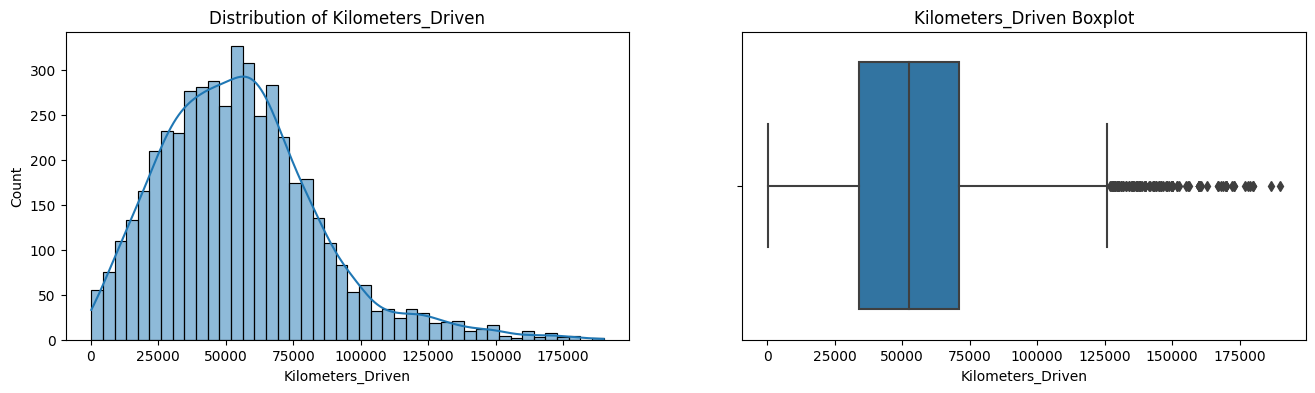

In [45]:
#distribution of kilometers driven
plot_num(df,'Kilometers_Driven')

#right skewed with median around 50000

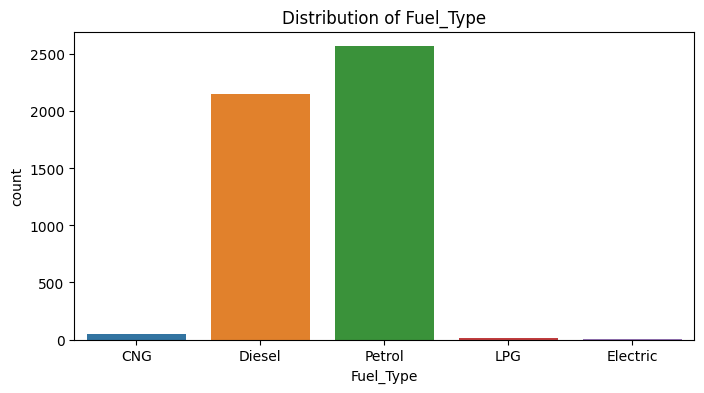

In [46]:
#count of fuel types
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

#diesel and petrol type vehicle is highest

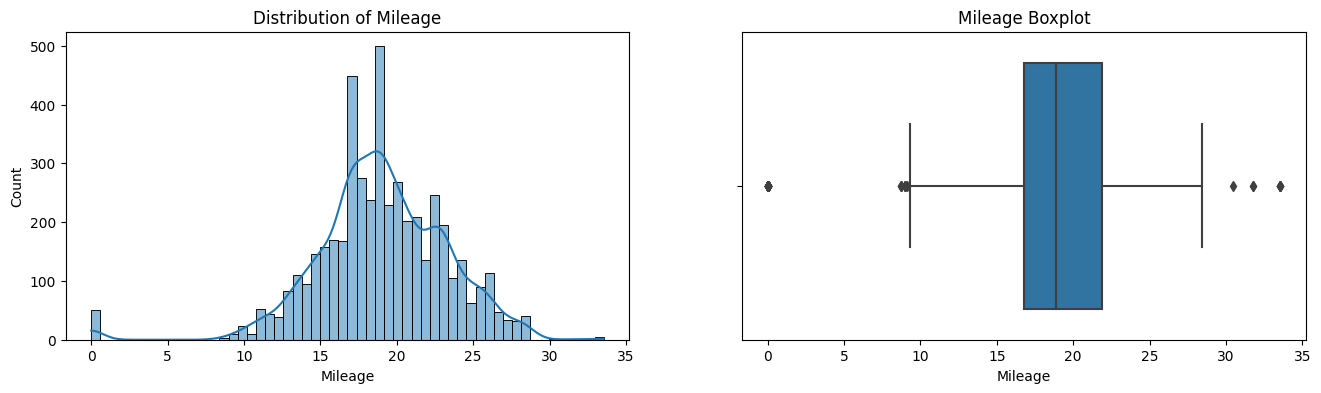

In [47]:
#distribution of Mileage
plot_num(df,'Mileage')

#normal distribution with few outliers

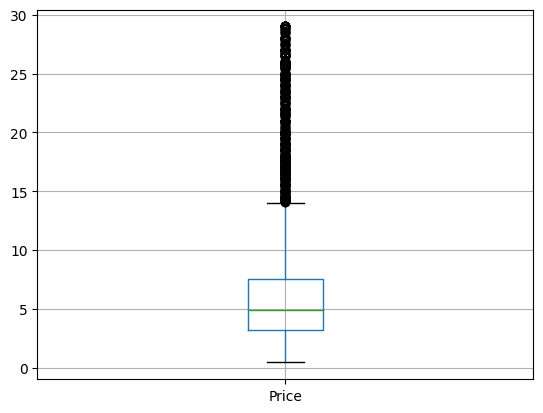

In [48]:
#spread of target column price.
label=pd.DataFrame(df.iloc[:,-1])
label.boxplot();

#lots of outliers; some transformation may be required

## 3. Bivariate Analysis

Text(0.5, 1.0, 'CORRELATION IN THE DATA')

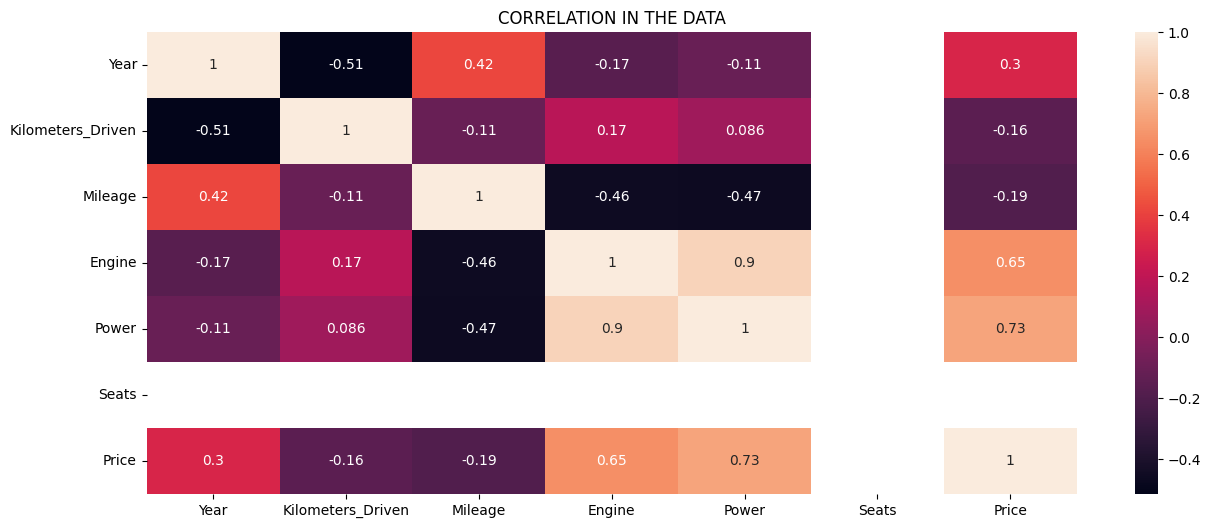

In [49]:
#checking correlation in the data
numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,6))
sns.heatmap(numeric_data.corr(),annot=True, fmt='.2g')
plt.title('CORRELATION IN THE DATA')

**Inference:**  High correlation between power, engine and price.

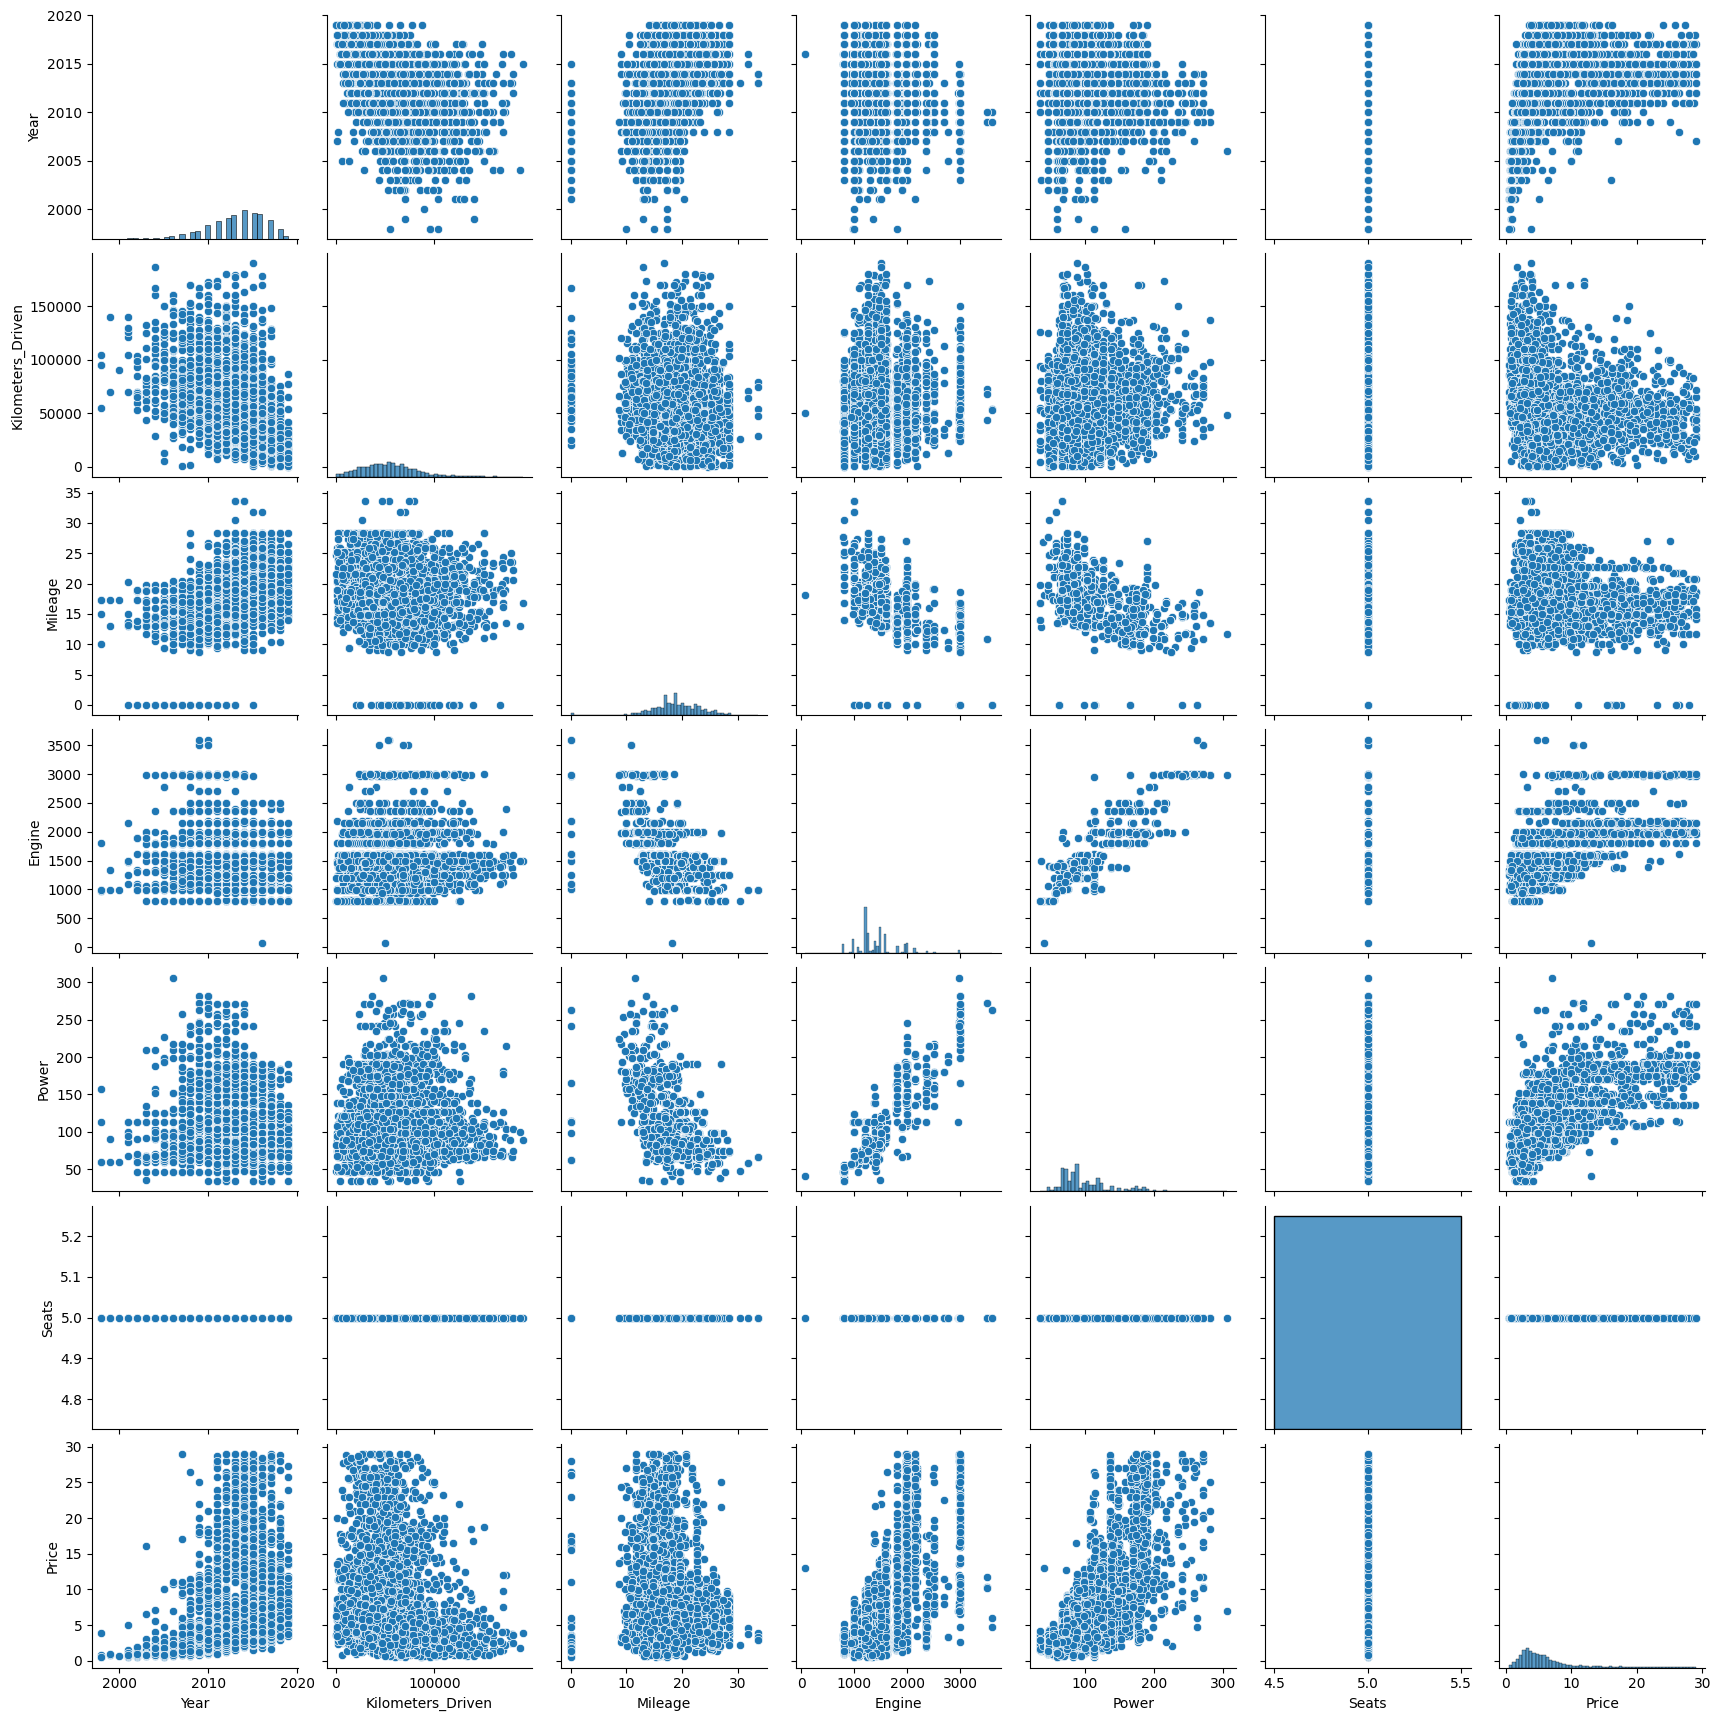

In [50]:
#seeing the overall distribution and relationship of all columns
sns.pairplot(df)

## 4.Feature selection

In [51]:
#preping the data for modelling ahead.
df_num=df.select_dtypes(include='number')
df_num

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
4,2013,40670,15.20,1968.0,140.80,5.0,17.74
5,2012,75000,21.10,814.0,55.20,5.0,2.35
...,...,...,...,...,...,...,...
6013,2015,70602,25.80,1498.0,98.60,5.0,4.83
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00
6017,2013,46000,18.90,998.0,67.10,5.0,2.65


In [52]:
#counting and removing outliers
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1


# ~ represents NOT or Exclude such rows
df=df[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
df.shape

(4443, 13)

In [53]:
((6019-4778)/6019)*100 # %age of outliers
#manaegble

20.618042864263167

In [54]:
#scaling the numerical features for modelling ahead
feat_num=df[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats']]
mmscaler = MinMaxScaler()
X1= pd.DataFrame(mmscaler.fit_transform(feat_num), columns=feat_num.columns)
X1

,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0.399429,0.717196,0.342836,0.113662,0.0
1,0.227043,0.434800,0.559052,0.436433,0.0
2,0.254848,0.374898,0.417253,0.258539,0.0
3,0.225208,0.252649,0.701962,0.505693,0.0
4,0.416112,0.493073,0.274713,0.099620,0.0
...,...,...,...,...,...
4438,0.391655,0.684597,0.527953,0.305503,0.0
4439,0.151221,0.790546,0.435394,0.188805,0.0
4440,0.555133,0.627547,0.388004,0.174573,0.0
4441,0.254848,0.403423,0.342836,0.156072,0.0


In [55]:
#encoding the categorical columns for modelling ahead
feat_cat=df[['Name','Location','Fuel_Type','Transmission','Owner_Type']]
OHE = OneHotEncoder()
X2=OHE.fit_transform(feat_cat)
X2= pd.DataFrame(OHE.fit_transform(feat_cat).toarray(), columns=OHE.get_feature_names_out())
X2

,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A4 1.8 TFSI,Name_Audi A4 1.8 TFSI Technology Edition,Name_Audi A4 2.0 TDI,Name_Audi A4 2.0 TDI 177 Bhp Premium Plus,Name_Audi A4 2.0 TDI Celebration Edition,Name_Audi A4 2.0 TDI Multitronic,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [56]:
#joining the numerical and categorical data 
X=pd.concat([X1,X2],axis=1)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A4 1.8 TFSI,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.399429,0.717196,0.342836,0.113662,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.227043,0.434800,0.559052,0.436433,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.254848,0.374898,0.417253,0.258539,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.225208,0.252649,0.701962,0.505693,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.416112,0.493073,0.274713,0.099620,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [57]:
#count of nulls
X.isna().sum()

Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
                            ..
Transmission_Manual          0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Length: 1350, dtype: int64

In [58]:
#defining y
y=df['Price']

In [59]:
#name of columns
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [60]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

## 5. KNN Regression:

In [61]:
#fitting the model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [62]:
#predicting the train data
train_preds = knn_reg.predict(X_train)
#calculating the train performance
mse = mean_squared_error(y_train, train_preds)
knn_rmse_train = sqrt(mse)
print('RMSE Train: ',knn_rmse_train)
knn_mape_train=np.mean(abs(y_train - train_preds)/y_train)*100
print('MAPE Train: ',knn_mape_train)

RMSE Train:  1.629590550037556
MAPE Train:  23.05930482838586


In [63]:
#predicting the test data
test_preds = knn_reg.predict(X_test)
#calculating the test performance
mse = mean_squared_error(y_test, test_preds)
knn_rmse_test = sqrt(mse)
print('RMSE Test: ',knn_rmse_test)
knn_mape_test=np.mean(abs(y_test - test_preds)/y_test)*100
print('MAPE Test: ',knn_mape_test)

RMSE Test:  2.0509945864624863
MAPE Test:  29.85414378677134


In [64]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors'],
                       'Train_RMSE':[knn_rmse_train],
                       'Test_RMSE':[knn_rmse_test],
                        'Train_MAPE':[knn_mape_train],
                        'Test_MAPE':[knn_mape_test],
                        'R Sq':['NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,1.629591,2.050995,23.059305,29.854144,NA


## 6.Decision Tree

In [65]:
#fitting decision tree
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])

In [66]:
#defining X and y
X=df[['Name', 'Location', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [67]:
X_dt = X
y_dt = df['Price']

In [68]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, random_state = 10, test_size = 0.3)

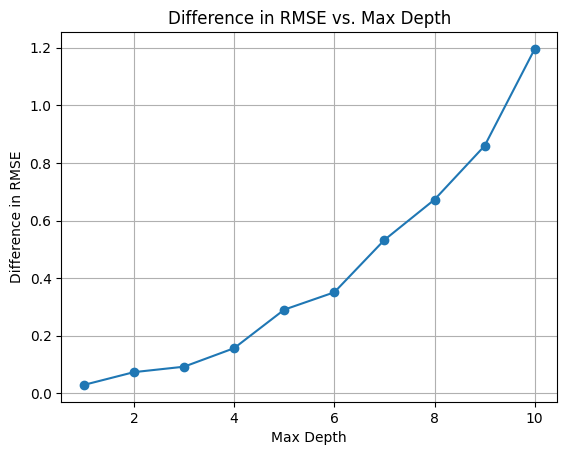

Lowest at max_depth=3 with difference:  0.0926465632637532


In [69]:
#loop to find best Max_depth value at which train-test rmse is lowest.
max_depth_values = []
rmse_diff_values = []
rmse_test_values = []
rmse_train_values = []

# Loop over different max_depth values
for max_depth in range(1, 11):
    # Create and fit the decision tree regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate RMSE for train and test data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate difference in RMSE
    rmse_diff = rmse_test - rmse_train
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)
    rmse_diff_values.append(rmse_diff)

# Plot the graph
plt.plot(max_depth_values, rmse_diff_values, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Difference in RMSE')
plt.title('Difference in RMSE vs. Max Depth')
plt.grid(True)
plt.show()
#lowest at max_depth=3
print('Lowest at max_depth=3 with difference: ',rmse_diff_values[2])

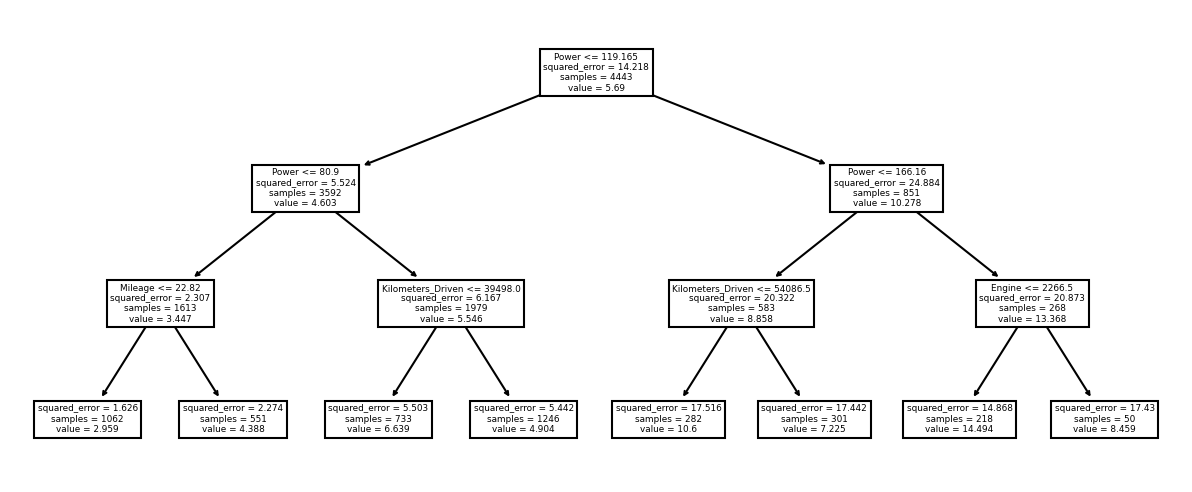

In [71]:
#visualing the tree
dtr = DecisionTreeRegressor(max_depth=3,random_state=0)
model = dtr.fit(X_dt,y_dt)
plt.figure(figsize=(10,4), dpi=150)
plot_tree(model, feature_names=X_dt.columns);

In [72]:
#feature importance
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,Name,0.000000
1,Location,0.000000
2,Kilometers_Driven,0.086884
3,Fuel_Type,0.000000
4,Transmission,0.000000
5,Owner_Type,0.000000
6,Mileage,0.021118
7,Engine,0.042229
8,Power,0.849769
9,Seats,0.000000


In [73]:
#metrics of train data: RMSE
y_hat_train=model.predict(X_train)
dt_RMSE_train=np.sqrt(sum((y_train-y_hat_train)**2)/y_train.shape[0])
dt_MAPE_train=np.mean((abs(y_train - y_hat_train)/y_train)*100)
dt_RMSE_train,dt_MAPE_train

(2.5048259438045664, 43.9282493134464)

In [74]:
#metrics of test data: RMSE
y_hat_test=model.predict(X_test)
dt_RMSE_test=np.sqrt(sum((y_test-y_hat_test)**2)/y_test.shape[0])
dt_MAPE_test=np.mean((abs(y_test - y_hat_test)/y_test)*100)
dt_RMSE_test,dt_MAPE_test

(2.5376114389008215, 44.95131623569962)

In [76]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test],
                        'R Sq':['NA','NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,1.629591,2.050995,23.059305,29.854144,NA
1,Decision_Tree,2.504826,2.537611,43.928249,44.951316,NA


# 7.Linear Regression

In [77]:
# defining X and y
X_lr=X_dt
y_lr=df['Price']

In [78]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, random_state = 10, test_size = 0.3)

In [79]:
#fitting the data
lm = LinearRegression()
lr = lm.fit(X_train,y_train)

R2=lr.score(X_train,y_train)
R2

0.6347999685137059

In [80]:
#coefficients and intercept
lr.intercept_, lr.coef_

(4.535511862073983,
 array([-6.12504724e-05, -1.37163525e-01, -3.72189968e-05, -5.95879796e-01,
        -1.93318574e+00, -4.50703765e-01,  5.38265868e-02, -2.84131222e-04,
         6.98129837e-02,  0.00000000e+00]))

In [81]:
#predicting
yhat_train = lr.predict(X_train)
yhat_test = lr.predict(X_test)

In [82]:
#RMSE of train and test
lr_RMSE_train = np.sqrt(sum((y_train-yhat_train)**2)/y_train.shape[0])
lr_RMSE_test = np.sqrt(sum((y_test-y_hat_test)**2)/y_test.shape[0])
lr_RMSE_train, lr_RMSE_test

(2.2518065616480847, 2.5376114389008215)

In [83]:
#MAPE of train and test
lr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
lr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)
lr_MAPE_train,lr_MAPE_test

(38.41538503761888, 39.29248704366483)

In [84]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree','Linear_Regression'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train,lr_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test,lr_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train,lr_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test,lr_MAPE_test],
                        'R Sq':['NA','NA',R2]})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,1.629591,2.050995,23.059305,29.854144,NA
1,Decision_Tree,2.504826,2.537611,43.928249,44.951316,NA
2,Linear_Regression,2.251807,2.537611,38.415385,39.292487,0.6348


In [85]:
#validating the model performance with test data
test_df=pd.read_csv('used_cars_test.csv')
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [86]:
#encoding the columns
test_df['Name'] = label_encoder.fit_transform(test_df['Name'])
test_df['Location'] = label_encoder.fit_transform(test_df['Location'])
test_df['Fuel_Type'] = label_encoder.fit_transform(test_df['Fuel_Type'])
test_df['Transmission'] = label_encoder.fit_transform(test_df['Transmission'])
test_df['Owner_Type'] = label_encoder.fit_transform(test_df['Owner_Type'])

In [87]:
# Define a regex pattern to match numeric values with optional decimal points
pattern = r'(\d+(\.\d+)?)'

# Function to remove units from a string
def remove_units(value):
    if isinstance(value, float):
        value = str(value)
    matches = re.findall(pattern, value)
    if matches:
        return matches[0][0]
    return value

# Apply the function to the 'Mileage' column
test_df['Mileage'] = test_df['Mileage'].apply(remove_units)
test_df['Engine'] = test_df['Engine'].apply(remove_units)
test_df['Power'] = test_df['Power'].apply(remove_units)
test_df['New_Price'] = test_df['New_Price'].apply(remove_units)


In [88]:
#applying same data preparation techniques on test
test_df['Power'] = test_df['Power'].replace('null bhp', np.nan)

In [91]:
test_df['Mileage'] = test_df['Mileage'].astype('float64')
test_df['Engine'] = test_df['Engine'].astype('float64')
test_df['Power'] = test_df['Power'].astype('float64')
test_df['Name'] = test_df['Name'].astype('float64')
test_df['Location'] = test_df['Location'].astype('float64')
test_df['Kilometers_Driven'] = test_df['Kilometers_Driven'].astype('float64')
test_df['Fuel_Type'] = test_df['Fuel_Type'].astype('float64')
test_df['Transmission'] = test_df['Transmission'].astype('float64')
test_df['Owner_Type'] = test_df['Owner_Type'].astype('float64')

In [92]:
test_df['Seats'].fillna(test_df['Seats'].median(),inplace=True)
test_df['Engine'].fillna(test_df['Engine'].mean(),inplace=True)
test_df['Power'].fillna(test_df['Power'].mean(),inplace=True)

In [93]:
X=test_df[['Name', 'Location','Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [94]:
yhat = lr.predict(X)

In [95]:
yhat=pd.DataFrame(yhat)

In [96]:
yhat.to_csv('used_car_output1.excel', index=False)

In [97]:
# Calculate the absolute values of coefficients
coefficients=lr.coef_
absolute_coefficients = np.abs(coefficients)

# Calculate the feature importance as the percentage of contribution
feature_names = ['Name', 'Location', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
feature_importance = (absolute_coefficients / np.sum(absolute_coefficients)) * 100

# Print the feature importance
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name}: {importance}%")

Name: 0.001889889631249574%
Location: 4.2321946712401%
Kilometers_Driven: 0.0011483959774832477%
Fuel_Type: 18.38593243747916%
Transmission: 59.64864496155325%
Owner_Type: 13.906511072216285%
Mileage: 1.6608248764816012%
Engine: 0.008766898086809471%
Power: 2.1540867973340463%
Seats: 0.0%


In [98]:
feature_importance

array([1.88988963e-03, 4.23219467e+00, 1.14839598e-03, 1.83859324e+01,
       5.96486450e+01, 1.39065111e+01, 1.66082488e+00, 8.76689809e-03,
       2.15408680e+00, 0.00000000e+00])

## 8. Improvement Step: Linear model with transformation on target column

In [99]:
#drooping uncessary columns
df2=df2.drop('New_Price',axis=1)

In [100]:
#dropping nulls
df2=df2.dropna()
df2.shape

(5975, 12)

In [101]:
#replacing non-standard null values to standard null values
df2['Mileage'] = df2['Mileage'].replace('nan', np.nan)
df2['Engine'] = df2['Engine'].replace('nan', np.nan)
df2['Power'] = df2['Power'].replace('nan', np.nan)
df2['Seats'] = df2['Seats'].replace('nan', np.nan)

#using regular expression to remove units and unnecessary suffixes
#removing units
data=df.Mileage
# Define a regex pattern to match numeric values with optional decimal points
pattern = r'(\d+(\.\d+)?)'

# Function to remove units from a string
def remove_units(value):
    if isinstance(value, float):
        value = str(value)
    matches = re.findall(pattern, value)
    if matches:
        return matches[0][0]
    return value

# Apply the function to the required columns
df2['Mileage'] = df2['Mileage'].apply(remove_units)
df2['Engine'] = df2['Engine'].apply(remove_units)
df2['Power'] = df2['Power'].apply(remove_units)

#replacing null values in new-pricce columns
df2['Power'] = df2['Power'].replace('null bhp', np.nan)

In [102]:
#encoding the categorical columns for modelling ahead
label_encoder = LabelEncoder()

# Encoding
df2['Name'] = label_encoder.fit_transform(df2['Name'])
df2['Location'] = label_encoder.fit_transform(df2['Location'])
df2['Fuel_Type'] = label_encoder.fit_transform(df2['Fuel_Type'])
df2['Transmission'] = label_encoder.fit_transform(df2['Transmission'])
df2['Owner_Type'] = label_encoder.fit_transform(df2['Owner_Type'])

Xcat=df2[['Name','Location','Fuel_Type','Transmission','Owner_Type']]
Xcat


,Name,Location,Fuel_Type,Transmission,Owner_Type
0,1181,9,0,1,0
1,504,10,1,1,0
2,478,2,3,1,0
3,1045,2,1,1,0
4,23,3,1,0,2
...,...,...,...,...,...
6014,1140,4,1,1,0
6015,657,6,1,1,0
6016,918,6,1,1,2
6017,1188,8,3,1,0


In [103]:
#scaling and transform
#scaling the numerical features for modelling ahead
feat_num2=df2[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats']]
mmscaler = MinMaxScaler()
Xnum= pd.DataFrame(mmscaler.fit_transform(feat_num2), columns=feat_num2.columns)
Xnum

,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0.011051,0.793083,0.069594,0.045569,0.5
1,0.006282,0.586464,0.178266,0.174971,0.5
2,0.007051,0.542636,0.106997,0.103652,0.5
3,0.013359,0.619261,0.116115,0.103766,0.7
4,0.006231,0.453190,0.250093,0.202739,0.5
...,...,...,...,...,...
5970,0.004184,0.846750,0.116115,0.075694,0.5
5971,0.015359,0.727490,0.092296,0.069989,0.5
5972,0.008435,0.417412,0.348716,0.147965,0.8
5973,0.007051,0.563506,0.069594,0.062571,0.5


In [104]:
Xnum.reset_index(drop=True, inplace=True)
Xcat.reset_index(drop=True, inplace=True)
result = pd.concat([Xnum, Xcat], axis=1)
result.shape

(5975, 10)

In [105]:
#transforming the price column using log transform
df2['Log_price']=np.log(df2['Price'])
y=df2['Log_price']
X=result

In [107]:
# Create the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector
model = LinearRegression()

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=model, k_features='best', forward=True, verbose=2, scoring='r2')

# Perform feature selection
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X)
X_test_selected = sfs.transform(X)

# Train a linear regression model on the selected features
model.fit(X_train_selected, y)

# Evaluate the model on the testing data
score = model.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py", line 648, in fit
    X, y = self._validate_data(
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\diksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


**INFERENCE:**
1. Features like Location, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Engine, Power are important.
2. Using Log-transform on target column improved performance, R2 score increased from 68.49% to 71.72% .
3. Factors that was once considered important like mileage actually proved to be insignificant, dur to high correlation with power feature.


# CONCLUSION:

Based on the provided model evaluation results, we can draw the following conclusions for the given models:

1. K-Nearest Neighbors:
   - Train_RMSE: 2.159613
   - Test_RMSE: 2.65918
   - Train_MAPE: 24.279039
   - Test_MAPE: 30.302340

   The K-Nearest Neighbors model achieved relatively low RMSE values for both the training and testing datasets, indicating good predictive performance. The MAPE values are also reasonably low, suggesting that the model's predictions are generally close to the actual values. 
   
2. Decision Tree:
   - Train_RMSE: 3.295694
   - Test_RMSE: 3.35003
   - Train_MAPE: 48.848673
   - Test_MAPE: 49.256506

   The Decision Tree model produced higher RMSE values compared to the K-Nearest Neighbors model, indicating a larger prediction error. The MAPE values are also relatively high, suggesting that the model's predictions have larger percentage errors.

3. Linear Regression:
   - Train_RMSE: 3.131636
   - Test_RMSE: 3.35003
   - Train_MAPE: 45.358204
   - Test_MAPE: 46.279513
   - R-squared: 0.684973

   The Linear Regression model achieved moderate RMSE values for both the training and testing datasets. The MAPE values are also reasonable, indicating that the model's predictions are relatively close to the actual values. The R-squared value of 0.684973 suggests that approximately 68.5% of the variance in the target variable can be explained by the model, indicating a moderate level of fit.

In conclusion, among the evaluated models, the **Linear Regression** model appears to have the best performance based on the lower RMSE and MAPE values. Linear model after log transformation on target gave better explaination of variation when R2 increased to **71.72%**.